# Modelling a communication channel using Python

## Introduction
In this tutorial, we will model a communication channel and send a audio signal through. We will do this transmission in two different ways
    - Analog transmission
    - Digital transmission
We will observe from the received signal and its corresponding SNR values how digital transmission is much more advantageous and immune to noise compared analog.

### Importing the libraries

First let us import the relevant frameworks to process audio. Since this is a simple project we will only use numpy and scipy.

In [1]:
# Import libraries
import numpy as np
from scipy.io import wavfile
import IPython

# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Set figure size
plt.rcParams["figure.figsize"] = (14,4)

### Read audio file

We will now read a speech signal in the form of a .wav file. 

Keep in mind that, this audio file is already a digital since computers only deal in digital signals.But for the sake of this simulation we will assume it is analog in nature. 

To model the digital version of this analog signal we will constrain its amplitudes to integer values.

With these information in mind, we will read the audio while also recording the sampling rate at which it is sampled.(We can assume that the sampling rate is sufficiently large to conside this raw signal as analog)

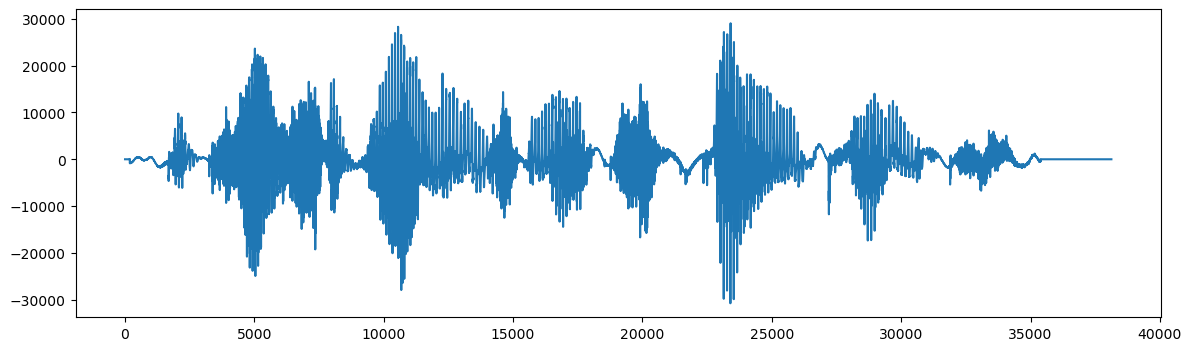

In [2]:
# Read speech signal
sampling_rate, speech = wavfile.read('assets/audio/speech.wav')

# Visualize and play the audio
plt.plot(speech);
IPython.display.Audio(speech, rate=sampling_rate)

## Preprocessing audio

Now we will simply preprocess this raw audio signal for easier processing and visualization. To do that we it is amplitude normalized to fit into +100 and -100.

In [3]:
# Normalize the raw audio
normalized = 1.0 / max(np.absolute([min(speech), max(speech)]))
analogSignal = 100.0 * speech * normalized

Now to model the digital version of this processed signal we will round off its amplitudes into nearest integers. We can change the step size (amplitude difference between two levels) and observe how it affects the signal. Clearly the quality of the audio drops when we increase the step size.

In [70]:
STEP_SIZE = 5

# Round up the analog signal to the digitized levels
digitalSignal = np.round(analogSignal / STEP_SIZE ) * STEP_SIZE

### Signal to Noise Ration (SNR)

The following function calculates SNR which is a metric to measure or compare the noise level of a signal.

In [5]:
def SNR(noisy_signal, clean_signal):
    # Noise power
    noisePower = np.linalg.norm(noisy_signal-clean_signal)
    
    # Signal power
    signalPower = np.linalg.norm(clean_signal)
    
    # SNR measured in dBs
    return 10 * np.log10(signalPower/noisePower)

Now we can use this to measure the drop of quality between the analog and the digital signals

In [6]:
print ('SNR = %f dB' % SNR(digitalSignal, analogSignal))

SNR = 14.150821 dB


Change the step size and observe the change in SNR. As the step size is increased this quality drop becomes more audible.

In [7]:
IPython.display.Audio(analogSignal, rate=sampling_rate)

In [71]:
IPython.display.Audio(digitalSignal, rate=sampling_rate)

The less amplitude levels (bins) we have (i.e. the larger the step size), the lower will be the quality of the audio

In [9]:
# Use less number of bins
lowQSignal = np.round(analogSignal / 50 ) * 50
IPython.display.Audio(lowQSignal, rate=sampling_rate)

Now we have our analog signal and the digital signal of the same waveform. Let us now model our communications channel as a function. We will define the as a Additive White Gaussian Noise channel. We will pass the signal through this function.

Remember that the channel can be modelled using the following equation:

$$ Y(t) = A\cdot X(t) + N(t)$$

where,
- $Y(t)$ is the received signal 
- $X(t)$ is the transmitted signal 
- $A$ is the attenuation 
- $N(t)$ is the AWGN noise

In [78]:
def channel(signal, noise_amplitude, attenuation, channel_length):
    '''
    signal - transmitted signal
    noise_amplitude - AWGN noise introduced per unit length of the channel
    attenuation - signal attenuation per unit length of the channel
    channel_length - total length of the channel
    '''
    
    # Create AWGN noise using distribution
    noise = np.random.uniform(-noise_amplitude, noise_amplitude, len(signal))
    
    # Keep adding noise and attenuating for the whole length
    for i in range(channel_length):
        signal = attenuation * signal + 0.1* noise
    
    # Return the received output signal
    return signal

We will now pass each signal through the channel and receive them. When receiving the digital signal however, we have to make sure it is quantized. (Can only take specific values)

In [79]:
LENGTH = 70
NOISE_AMPLITUDE = 0.01
ATTENUATION = 0.99

yAnalog = channel(analogSignal, NOISE_AMPLITUDE, ATTENUATION, LENGTH)
print ('Analog trasmission: SNR = %f dB' % SNR(yAnalog, analogSignal))    

yDigital = np.round(channel(digitalSignal, NOISE_AMPLITUDE, ATTENUATION, LENGTH) / STEP_SIZE ) * STEP_SIZE
print ('Digital trasmission: SNR = %f dB' % SNR(yDigital, analogSignal))    

Analog trasmission: SNR = 2.965656 dB
Digital trasmission: SNR = 2.520522 dB


In [76]:
IPython.display.Audio(yAnalog, rate=sampling_rate)

In [77]:
IPython.display.Audio(yDigital, rate=sampling_rate)

In [55]:
NOISE_AMPLITUDE = 0.3

yA = analog_tx(sA, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog trasmission: SNR = %f dB' % SNR(yA, sA))   

yD = digital_tx(sD, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital trasmission: SNR = %f dB' % SNR(yD, sA))   

NameError: name 'sA' is not defined